In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Ejercicios Introduccion Numeros complejos


## Exercise 1: Basic Complex Number Operations
1. Manually calculate and then verify using Python the result of `(3 + 4j) + (1 - 2j)`, `(5 + 6j) * (7 - 8j)`, and `(2 - 3j) / (1 + 4j)`.
2. Find the conjugate and modulus of `(3 - 4j)`.

In [ ]:
# Ejercicio 1
print((3 + 4j) + (1 - 2j))
print((5 + 6j) * (7 - 8j))
print((2 + 3j) * (1 - 4j))

(4+2j)
(83+2j)
(14-5j)


## Exercise 2: Visualizing Complex Operations
1. Write a Python function to plot a complex number on the complex plane. Use it to plot `(3 + 4j)` and its conjugate.
2. Extend the function to show addition and multiplication of two complex numbers graphically.

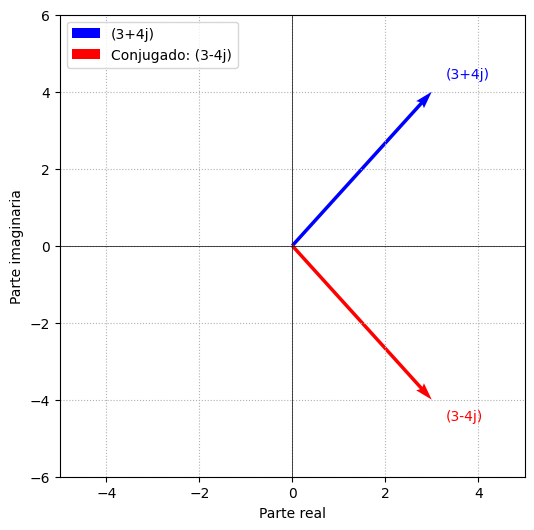

In [ ]:


def plot_complex(z, show_conjugate=True, ax=None):
    """
    Grafica un número complejo z como vector en el plano complejo.
    Si show_conjugate es True, también grafica su conjugado.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
    # Ejes y formato
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlabel('Parte real')
    ax.set_ylabel('Parte imaginaria')
    lim_re = max(5, abs(z.real)+2)
    lim_im = max(5, abs(z.imag)+2)
    ax.set_xlim(-lim_re, lim_re)
    ax.set_ylim(-lim_im, lim_im)
    ax.grid(True, which='both', linestyle=':')

    # Graficar el vector z desde el origen
    ax.quiver(0, 0, z.real, z.imag, angles='xy', scale_units='xy', scale=1, color='blue', label=f'{z}')
    ax.annotate(f'{z}', (z.real, z.imag), textcoords="offset points", xytext=(10,10), color='blue')

    # Graficar el conjugado como vector desde el origen
    if show_conjugate:
        conj = z.conjugate()
        ax.quiver(0, 0, conj.real, conj.imag, angles='xy', scale_units='xy', scale=1, color='red', label=f'Conjugado: {conj}')
        ax.annotate(f'{conj}', (conj.real, conj.imag), textcoords="offset points", xytext=(10,-15), color='red')

    ax.legend()
    plt.show()

# Ejemplo: graficar 3+4j y su conjugado como vectores
z = 3 + 4j
plot_complex(z)


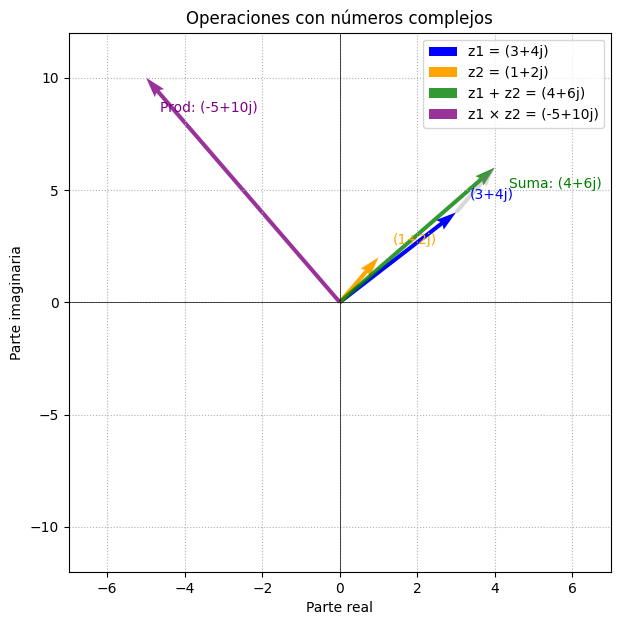

In [ ]:


def plot_complex_operations(z1, z2):
    """
    Grafica dos números complejos z1 y z2 en el plano complejo,
    mostrando sus vectores, la suma y la multiplicación.
    """
    # Calculamos la suma y el producto
    suma = z1 + z2
    producto = z1 * z2

    # Para ajustar límites, incluimos todos los puntos
    all_points = [z1, z2, suma, producto]
    lim_re = max(abs(z.real) for z in all_points) + 2
    lim_im = max(abs(z.imag) for z in all_points) + 2

    fig, ax = plt.subplots(figsize=(7,7))
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlabel('Parte real')
    ax.set_ylabel('Parte imaginaria')
    ax.set_xlim(-lim_re, lim_re)
    ax.set_ylim(-lim_im, lim_im)
    ax.grid(True, which='both', linestyle=':')

    # Vectores principales desde el origen
    ax.quiver(0, 0, z1.real, z1.imag, angles='xy', scale_units='xy', scale=1, color='blue', label=f'z1 = {z1}')
    ax.quiver(0, 0, z2.real, z2.imag, angles='xy', scale_units='xy', scale=1, color='orange', label=f'z2 = {z2}')
    ax.annotate(f'{z1}', (z1.real, z1.imag), textcoords="offset points", xytext=(10,10), color='blue')
    ax.annotate(f'{z2}', (z2.real, z2.imag), textcoords="offset points", xytext=(10,10), color='orange')

    # Suma de los dos vectores
    ax.quiver(0, 0, suma.real, suma.imag, angles='xy', scale_units='xy', scale=1, color='green', label=f'z1 + z2 = {suma}', alpha=0.8)
    ax.annotate(f'Suma: {suma}', (suma.real, suma.imag), textcoords="offset points", xytext=(10,-15), color='green')

    # Multiplicación de los dos vectores
    ax.quiver(0, 0, producto.real, producto.imag, angles='xy', scale_units='xy', scale=1, color='purple', label=f'z1 × z2 = {producto}', alpha=0.8)
    ax.annotate(f'Prod: {producto}', (producto.real, producto.imag), textcoords="offset points", xytext=(10,-25), color='purple')

    # Opcional: Dibuja también la suma como z1 + z2 partiendo desde z1
    ax.quiver(z1.real, z1.imag, z2.real, z2.imag, angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.3, linestyle='dashed')

    ax.legend()
    plt.title('Operaciones con números complejos')
    plt.show()

# Ejemplo de uso
z1 = 3 + 4j
z2 = 1 + 2j
plot_complex_operations(z1, z2)


## Exercise 3: Exploring the Mandelbrot Set
1. Modify the provided Mandelbrot set code to change its zoom level and center point. Observe how the fractal pattern changes.
2. Experiment with different values of `max_iter` and observe the effect on the fractal's detail and computation time.

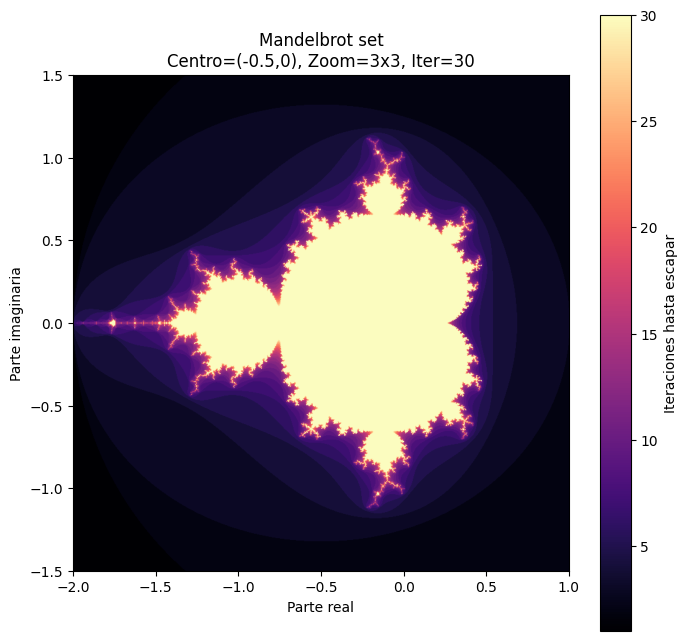

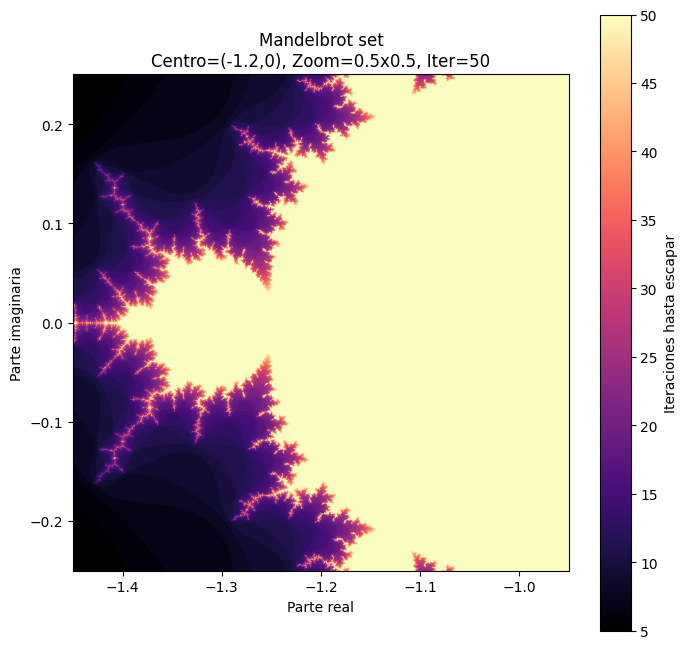

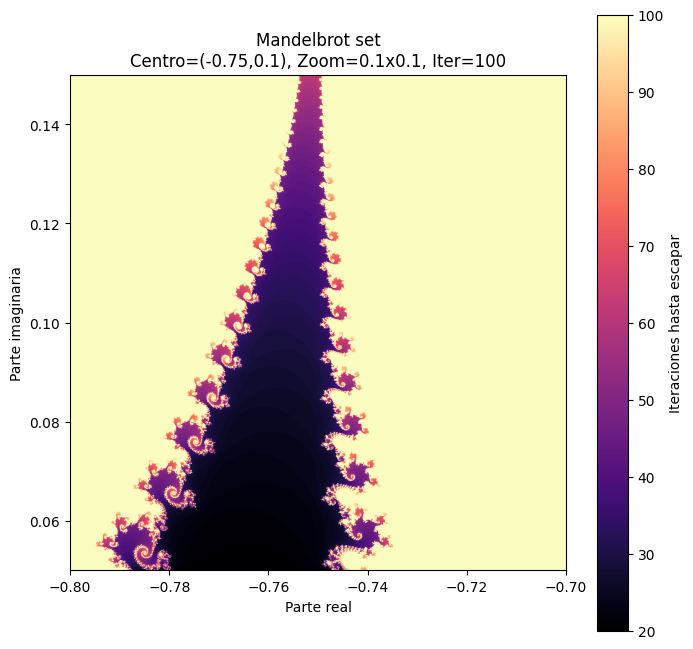

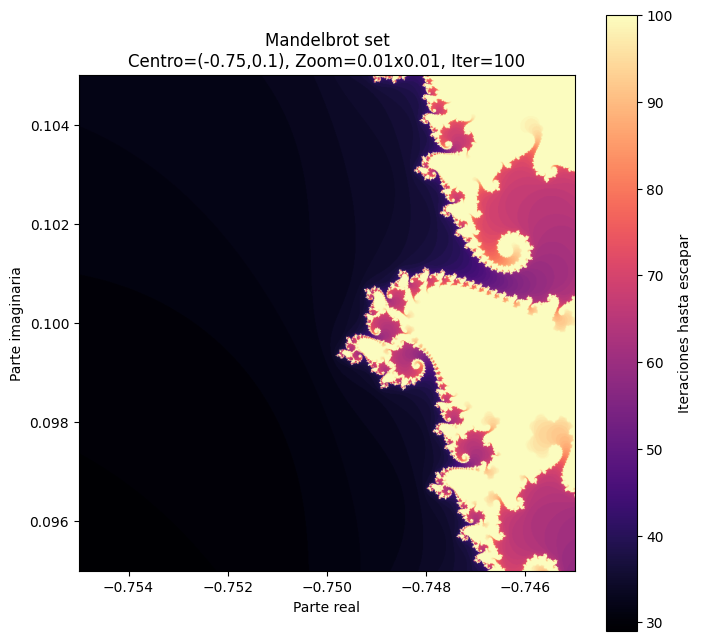

In [ ]:

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def plot_mandelbrot(center_x, center_y, width, height, pixels=800, max_iter=30):
    """
    Dibuja el conjunto de Mandelbrot con un centro y zoom especificados.
    - center_x, center_y: coordenadas del centro (en el plano complejo)
    - width, height: ancho y alto de la ventana en el plano complejo
    """
    x_min = center_x - width/2
    x_max = center_x + width/2
    y_min = center_y - height/2
    y_max = center_y + height/2
    x = np.linspace(x_min, x_max, pixels)
    y = np.linspace(y_min, y_max, pixels)
    xx, yy = np.meshgrid(x, y)
    c = xx + 1j * yy

    mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

    plt.figure(figsize=(8,8))
    plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='magma')
    plt.xlabel('Parte real')
    plt.ylabel('Parte imaginaria')
    plt.title(f"Mandelbrot set\nCentro=({center_x},{center_y}), Zoom={width}x{height}, Iter={max_iter}")
    plt.colorbar(label="Iteraciones hasta escapar")
    plt.show()

# Ejemplo 1: Vista estándar (todo el conjunto)
plot_mandelbrot(center_x=-0.5, center_y=0, width=3, height=3, pixels=800, max_iter=30)

# Ejemplo 2: Zoom en el borde izquierdo
plot_mandelbrot(center_x=-1.2, center_y=0, width=0.5, height=0.5, pixels=800, max_iter=50)

# Ejemplo 3: Zoom extremo en un "satélite"
plot_mandelbrot(center_x=-0.75, center_y=0.1, width=0.1, height=0.1, pixels=800, max_iter=100)

plot_mandelbrot(center_x=-0.75, center_y=0.1, width=0.01, height=0.01, pixels=800, max_iter=100)


## Exercise 4: Creating a Julia Set
1. Implement a Julia set generator. Use a constant like `-0.4 + 0.6j` for the iteration `z = z*z + constant`.
2. Explore how changing the constant changes the pattern of the Julia set.

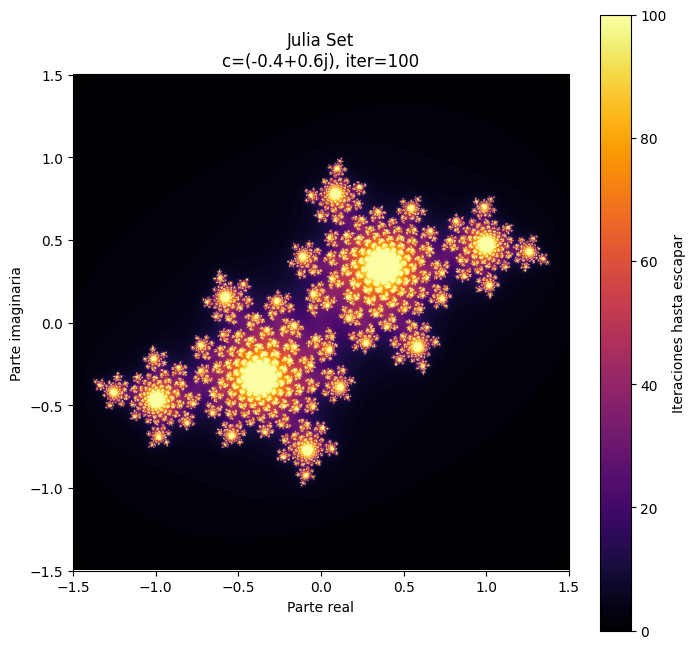

In [ ]:


def julia(z, c, max_iter):
    """Devuelve cuántas iteraciones tarda z en escapar (o max_iter si no escapa)."""
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def plot_julia(constant_c, pixels=800, max_iter=30, x_range=(-1.5, 1.5), y_range=(-1.5, 1.5)):
    """
    Dibuja el conjunto de Julia para un valor fijo de c.
    - constant_c: número complejo constante usado en la iteración
    """
    x = np.linspace(x_range[0], x_range[1], pixels)
    y = np.linspace(y_range[0], y_range[1], pixels)
    xx, yy = np.meshgrid(x, y)
    z = xx + 1j*yy

    # Aplica la función de Julia a cada punto
    julia_set = np.array([julia(zi, constant_c, max_iter) for zi in z.ravel()]).reshape(z.shape)

    plt.figure(figsize=(8,8))
    plt.imshow(julia_set, extent=[x_range[0], x_range[1], y_range[0], y_range[1]], cmap='inferno')
    plt.xlabel('Parte real')
    plt.ylabel('Parte imaginaria')
    plt.title(f'Julia Set\nc={constant_c}, iter={max_iter}')
    plt.colorbar(label="Iteraciones hasta escapar")
    plt.show()

# Ejemplo 1: Julia set para c = -0.4 + 0.6j
plot_julia(constant_c=-0.4 + 0.6j, max_iter=100)


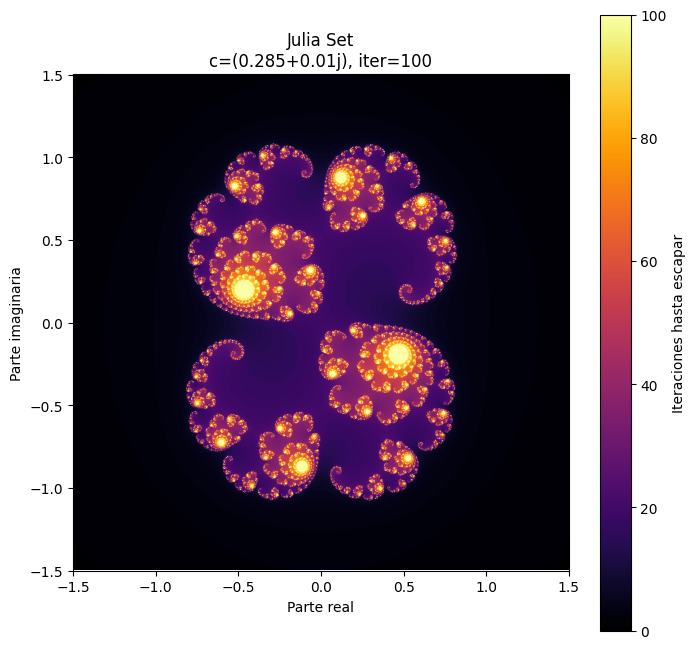

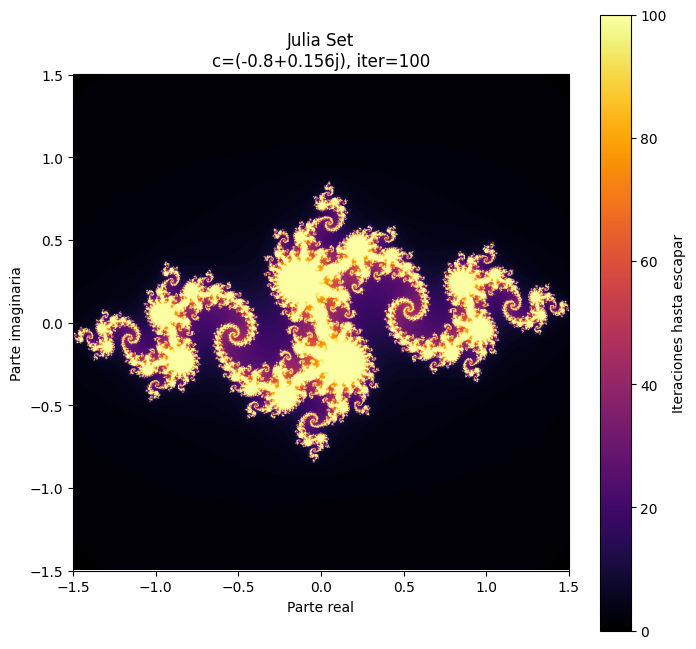

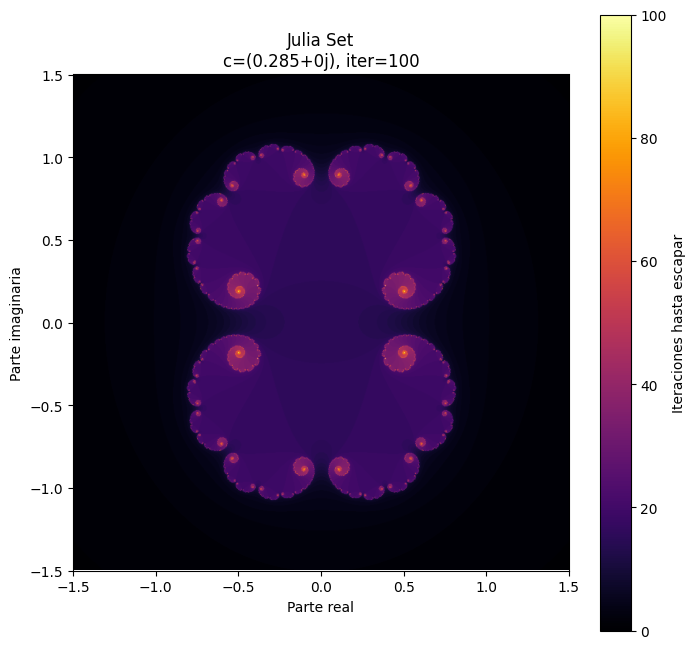

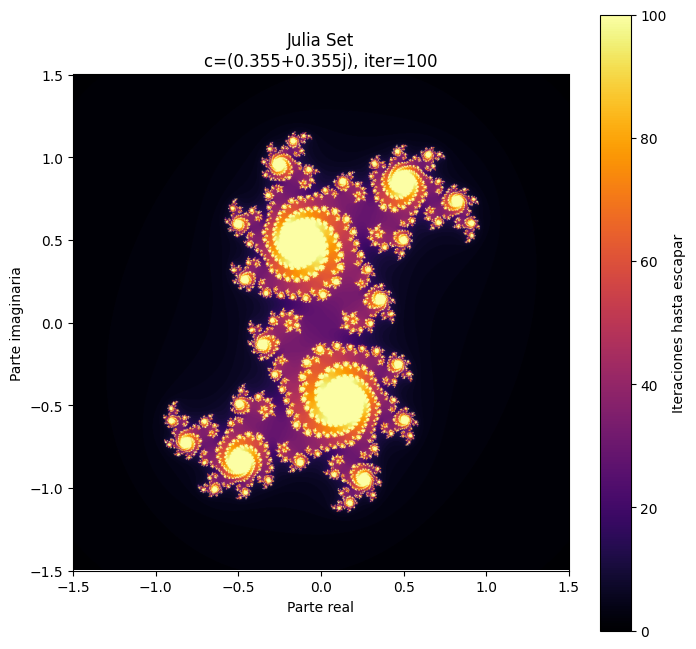

In [ ]:
# Diferentes constantes, diferentes patrones
plot_julia(constant_c=0.285 + 0.01j, max_iter=100)
plot_julia(constant_c=-0.8 + 0.156j, max_iter=100)
plot_julia(constant_c=0.285 + 0j, max_iter=100)
plot_julia(constant_c=0.355 + 0.355j, max_iter=100)


# Ejercicios Matrices y Vectores complejos

## Complex Column Vector Operations

### Exercise 1: Sum of Two Complex Vectors
Given two complex vectors
$ v1 = \begin{bmatrix} 1 + 2i \\ 3 - i \end{bmatrix} $
and
$ v2 = \begin{bmatrix} 2 - i \\ 4 + 2i \end{bmatrix} $,
find their sum.

In [ ]:
v1 = np.array([[1 + 2j], [3 - 1j]])
v2 = np.array([[2 - 1j], [4 + 2j]])

sum_v = v1 + v2
sum_v

array([[3.+1.j],
       [7.+1.j]])

### Exercise 2: Negation of a Complex Vector
Given a complex vector
$ v = \begin{bmatrix} 2 + 3i \\ 1 - 2i \end{bmatrix} $,
find its negation.

In [ ]:
v = np.array([[2 + 3j], [1 - 2j]])

-v

array([[-2.-3.j],
       [-1.+2.j]])

### Exercise 3: Multiplication of a Complex Vector by a Scalar
Multiply the complex vector
$ v = \begin{bmatrix} 1 - i \\ 2 + 2i \end{bmatrix} $
by the complex scalar $$ 3 + i $$.

In [ ]:
v_3 = np.array([[1 - 1j], [2 + 2j]])
escalar = 3 + 1j

v_3 * escalar

array([[4.-2.j],
       [4.+8.j]])

### Exercise 4: Transpose of a Complex Vector
Find the transpose of the complex vector
$ v = \begin{bmatrix} 2 - i \\ 3 + 4i \end{bmatrix} $.

In [ ]:
v_4 = np.array([[2 - 1j, 2], [3 + 4j, 3]])
display(v_4,
v_4.T)

array([[2.-1.j, 2.+0.j],
       [3.+4.j, 3.+0.j]])

array([[2.-1.j, 3.+4.j],
       [2.+0.j, 3.+0.j]])

### Exercise 5: Conjugate of a Complex Vector
Compute the conjugate of the complex vector
$ v = \begin{bmatrix} 1 + i \\ 2 - 3i \end{bmatrix} $.

In [ ]:
v_5 = np.array([[1 + 1j], [2 - 3j]])
np.conjugate(v_5)

array([[1.-1.j],
       [2.+3.j]])

### Exercise 6: Adjunct (Conjugate Transpose) of a Complex Vector
Find the adjunct (or conjugate transpose) of the complex vector
$ v = \begin{bmatrix} 1 - 2i \\ 3 + i \end{bmatrix} $.

In [ ]:
v_6 = np.array([[1 - 2j], [3 +1j]])
np.conjugate(v_6.T)

array([[1.+2.j, 3.-1.j]])

## Complex Square Matrix Operations

### Exercise 7: Sum of Two Complex Matrices
Given two complex matrices
$ m1 = \begin{bmatrix} 1 + i & 2 - i \\ 3 + 2i & 4 \end{bmatrix} $
and
$ m2 = \begin{bmatrix} 2 - 3i & 1 \\ i & 2 + 2i \end{bmatrix} $,
calculate their sum.

In [ ]:
m1 = np.array([[1 + 1j, 2 - 1j], [3 + 2j, 4]])
m2 = np.array([[2 - 3j, 1], [1j, 2 + 2j]])
m1 + m2

array([[3.-2.j, 3.-1.j],
       [3.+3.j, 6.+2.j]])

### Exercise 8: Negation of a Complex Matrix
Find the negation of the complex matrix
$ m = \begin{bmatrix} 2 + i & 3 \\ 1 - i & 2 + 2i \end{bmatrix} $.

In [ ]:
m_8 = np.array([[2 + 1j, 3],
                [1 - 1j, 2 + 2j]])
-m_8

array([[-2.-1.j, -3.-0.j],
       [-1.+1.j, -2.-2.j]])

### Exercise 9: Multiplication of a Complex Matrix by a Scalar
Multiply the complex matrix
$ m = \begin{bmatrix} 1 - i & 2 \\ 3 + i & 4 - 2i \end{bmatrix} $
by the complex scalar $$ 2 + 3i $$.

In [ ]:
m_9 = np.array([[1 - 1j, 2],
                [3 + 1j, 4 - 2j]])
c = 2 + 3j
c * m_9

array([[ 5. +1.j,  4. +6.j],
       [ 3.+11.j, 14. +8.j]])

### Exercise 10: Conjugate of a Complex Matrix
Compute the conjugate of the complex matrix
$ m = \begin{bmatrix} 1 + i & 2 \\ 3 - i & 4 + 2i \end{bmatrix} $.

In [ ]:
m_10 = np.array([[1 + 1j, 2],
                 [3 - 1j, 4 + 2j]])
np.conjugate(m_10)

array([[1.-1.j, 2.-0.j],
       [3.+1.j, 4.-2.j]])

### Exercise 11: Transpose of a Complex Matrix
Find the transpose of the complex matrix
$ m = \begin{bmatrix} 1 - i & 2 + 2i \\ 3 & 4 - i \end{bmatrix} $.

In [ ]:
m_11 = np.array([[1 - 1j, 2 + 2j],
                 [3, 4 -1j]])
m_11.T


array([[1.-1.j, 3.+0.j],
       [2.+2.j, 4.-1.j]])

### Exercise 12: Adjunct (Conjugate Transpose) of a Complex Matrix
Calculate the adjunct (or conjugate transpose) of the complex matrix
$ m = \begin{bmatrix} 1 + 2i & 3 - i \\ 4 & 5 + i \end{bmatrix} $.

In [ ]:
m_12 = np.array([[1 + 2j, 3 - 1j],
                 [4, 5 + 1j]])
np.conjugate(m_12.T)

array([[1.-2.j, 4.-0.j],
       [3.+1.j, 5.-1.j]])

### Exercise 13: Checking the Dimensions of a Matrix
Determine the dimensions of the complex matrix
$ m = \begin{bmatrix} 1 - i & 2 \\ 3 + 2i & 4 - i \end{bmatrix} $.

In [ ]:
m_13 = np.array([[1 - 1j, 2],
                 [3 + 2j, 4 - 1j]])
print(f"Dimensión: {m_13.shape}")
print(f"Rango: {np.linalg.matrix_rank(m_13)}")

Dimensión: (2, 2)
Rango: 2


## Multiplication of Matrices and Vectors

### Exercise 14: Multiplying a Complex Square Matrix by a Complex Column Vector

Multiply the complex square matrix
$ m = \begin{bmatrix} 1 + i & 2 - i \\ 3 & 4 + i \end{bmatrix} $
by the complex column vector
$ v = \begin{bmatrix} 2 - i \\ 1 + 3i \end{bmatrix} $.


In [ ]:
m_14 = np.array([[1 + 1j, 2 - 2j],
                 [3, 4 + 1j]])
v_14 = np.array([[2 - 2j],
                 [1 + 3j]])
np.dot(m_14, v_14)

array([[12.+4.j],
       [ 7.+7.j]])

# Exercises on Complex Vector and Matrix Operations

## Exercise 1: Complex Internal Product for Column Vectors

Given two complex column vectors:

$$ \mathbf{a} = \begin{bmatrix} 1 + 2i \\ 3 - 4i \end{bmatrix}, \quad \mathbf{b} = \begin{bmatrix} 2 - i \\ -1 + 3i \end{bmatrix} $$

Calculate the complex internal product $ \langle \mathbf{a}, \mathbf{b} \rangle $.

In [ ]:
a = np.array([[1 + 2j],
              [3 - 4j]])
b = np.array([[2 - 1j],
              [-1 + 3j]])


complex_internar_product_vector = np.vdot(a, b)
complex_internar_product_vector



np.complex128(-15+0j)

## Exercise 2: Complex Internal Product for Square Complex Matrices

Given two square complex matrices:

$$ A = \begin{bmatrix} 1+i & 2-2i \\ 3+3i & 4-i \end{bmatrix}, \quad B = \begin{bmatrix} 1-2i & 3+i \\ 4-4i & 2+2i \end{bmatrix} $$

Calculate the complex internal product $ \langle A, B \rangle $.

In [ ]:
A = np.array([[1 + 1j, 2 - 2j],
              [3 + 3j, 4 - 1j]])
B = np.array([[1 - 2j, 3 + 1j],
              [4 - 4j, 2 + 2j]])

np.trace(np.dot(np.conjugate(A.T), B))

np.complex128(9-9j)

# Exercises on eigenvalues and eigenvectors

## Exercise 1: Compute Eigenvalues and Eigenvectors of a Real Matrix

Compute the eigenvalues and eigenvectors of the following real matrix:

$$
A = \begin{pmatrix}
4 & 1 \\
2 & 3
\end{pmatrix}
$$

**Hint:** Use `numpy.linalg.eig`.

In [ ]:
A_1 = np.array([[4, 1],
              [3, 3]])

np.linalg.eig(A_1)

EigResult(eigenvalues=array([5.30277564, 1.69722436]), eigenvectors=array([[ 0.60889368, -0.3983218 ],
       [ 0.79325185,  0.91724574]]))

## Exercise 2: Eigenvalues and Eigenvectors of a Complex Matrix

Compute the eigenvalues and eigenvectors of the following complex matrix:

$$
B = \begin{pmatrix}
1 + 2i & 2 + 3i \\
4 + 5i & 6 + 7i
\end{pmatrix}
$$

where \(i\) is the imaginary unit.

**Hint:** Ensure your matrix is defined with complex numbers in Python using `dtype=complex`.

In [ ]:
B_2 = np.array([[1 + 2j, 2 + 3j],
              [4 + 5j, 6 + 7j]])

eigenValuesComplex, eigenVectorsComplex = np.linalg.eig(B_2)

print(f"Eigenvalues: {eigenValuesComplex}")
print(f"Eigenvector: {eigenVectorsComplex}")



Eigenvalues: [-0.25519526-0.09363597j  7.25519526+9.09363597j]
Eigenvector: [[ 0.8280679 +0.j          0.35299759+0.04782692j]
 [-0.559984  -0.02686037j  0.93440103+0.j        ]]


## Exercise 3: Symmetric Matrix Eigendecomposition

Compute the eigenvalues and eigenvectors of the following symmetric matrix:

$$
C = \begin{pmatrix}
5 & 4 \\
4 & 5
\end{pmatrix}
$$

Discuss the properties of the eigenvectors and eigenvalues for symmetric matrices based on your results.

In [ ]:
C_3 = np.array([[5, 4],
                [4, 5]])

np.linalg.eig(C_3)

EigResult(eigenvalues=array([9., 1.]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))

> Los vectores propios tienen norma uno y de igual forma son ortogonales entre si


## Exercise 4: Plotting Matrix Transformations

Consider the matrix:

$$
T = \begin{pmatrix}
2 & 1 \\
1 & 3
\end{pmatrix}
$$

1. Plot the unit circle.
2. Apply the matrix \(T\) to transform the unit circle.
3. Plot the transformed figure.
4. Show graphically that the eigenvectors are only multiplied by an escalar when transformed. (Plot the eigen vectors and the transformed ones)

Explain how the matrix \(T\) transforms the unit circle based on the resulting plot.

**Hint:** Use `numpy` for matrix operations and `matplotlib` for plotting.

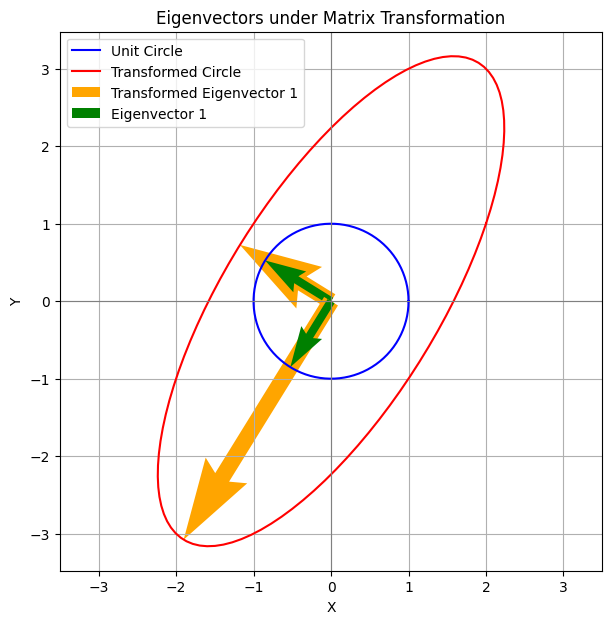

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la matriz de transformación
T = np.array([[2, 1], [1, 3]])

# Calcular autovalores y autovectores
eigvals, eigvecs = np.linalg.eig(T)

# Círculo unitario y transformación
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.array([np.cos(theta), np.sin(theta)])
transformed_circle = T @ circle

plt.figure(figsize=(7, 7))
plt.plot(circle[0], circle[1], 'b', label='Unit Circle')
plt.plot(transformed_circle[0], transformed_circle[1], 'r', label='Transformed Circle')

origin = np.zeros(2)

# Flechas más delgadas para mayor claridad
for i in range(2):
    v = eigvecs[:, i]
    v_norm = v / np.linalg.norm(v)
    tv = eigvals[i] * v_norm


    plt.quiver(*origin, *tv, color='orange', angles='xy', scale_units='xy', scale=1, width=0.03, label=f'Transformed Eigenvector {i+1}' if i==0 else None)
    plt.quiver(*origin, *v_norm, color='green', angles='xy', scale_units='xy', scale=1, width=0.015, label=f'Eigenvector {i+1}' if i==0 else None)

# Ajuste automático de límites
all_x = np.concatenate([circle[0], transformed_circle[0], [eigvals[0]*eigvecs[0,0], eigvals[1]*eigvecs[0,1]]])
all_y = np.concatenate([circle[1], transformed_circle[1], [eigvals[0]*eigvecs[1,0], eigvals[1]*eigvecs[1,1]]])
max_range = 1.2 * np.max(np.abs([all_x, all_y]))

plt.xlim(-max_range, max_range)
plt.ylim(-max_range, max_range)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)

plt.axis('equal')
plt.legend()
plt.title('Eigenvectors under Matrix Transformation')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


## Exercise 5: Diagonal Matrix Eigendecomposition

Compute the eigenvalues and eigenvectors of the following diagonal matrix:

$$
D = \begin{pmatrix}
7 & 0 \\
0 & -3
\end{pmatrix}
$$

Discuss the significance of the eigenvalues and eigenvectors for diagonal matrices.

In [ ]:
D = np.array([[7, 0],
              [0, -3]])

np.linalg.eig(D)

EigResult(eigenvalues=array([ 7., -3.]), eigenvectors=array([[1., 0.],
       [0., 1.]]))

Los valores propios son los valores de las componentes en la diagonal y los vectores son las dimensiones correspondiente a ese valor.

# Exercises on Complex Vector and Matrix Operation

## Exercise 1: Complex Hermitian Matrices

Consider the matrix:

$$ H = \begin{bmatrix} 3 & 2+i \\ 2-i & 1 \end{bmatrix} $$

- Verify if $ H $ is a Hermitian matrix.
- If it is, find its eigenvalues.

In [ ]:
H = np.array([[3 , 2 + 1j],
              [2 - 1j, 1]])
np.allclose(H, np.conjugate(H.T)), H

(True,
 array([[3.+0.j, 2.+1.j],
        [2.-1.j, 1.+0.j]]))

## Exercise 2: Complex Unitary Matrices

Consider the matrix:

$$ U = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & i \\ i & 1 \end{bmatrix} $$

- Verify if $ U $ is a Unitary matrix.
- Compute $ UU^\dagger $ to confirm its Unitarity, where $ U^\dagger $ denotes the conjugate transpose of $ U $.

In [ ]:
U = 1/2**(1/2) * np.array([[1, 1j], [1j, 1]])
np.allclose(np.dot(U, np.conjugate(U.T)), np.eye(2)), np.dot(U, np.conjugate(U.T))

(True,
 array([[1.+0.00000000e+00j, 0.+2.23711432e-17j],
        [0.-2.23711432e-17j, 1.+0.00000000e+00j]]))

## Exercise 3: Tensor Product for Complex Vectors

Given the complex vectors:

$$ \mathbf{v} = \begin{bmatrix} 1+i \\ 2-i \end{bmatrix}, \quad \mathbf{w} = \begin{bmatrix} 1-2i \\ 3 \end{bmatrix} $$

Calculate the tensor product $ \mathbf{v} \otimes \mathbf{w} $.

In [ ]:
V = np.array([[1 + 1j],
              [2 - 1j]])
W = np.array([[1 - 2j],
              [3]])

np.kron(V, W)

array([[3.-1.j],
       [3.+3.j],
       [0.-5.j],
       [6.-3.j]])

## Exercise 4: Tensor Product for Complex Matrices

Given the matrices:

$$ M_1 = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \quad M_2 = \begin{bmatrix} i & 0 \\ 0 & -i \end{bmatrix} $$

Calculate the tensor product $ M_1 \otimes M_2 $.

In [ ]:
M1 = np.array([[0, 1],
               [1, 0]])

M2 = np.array([[1j, 0],
               [0, -1j]])

np.kron(M1, M2).shape, np.kron(M1, M2)

((4, 4),
 array([[0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
        [0.+0.j, 0.-0.j, 0.+0.j, 0.-1.j],
        [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.-1.j, 0.+0.j, 0.-0.j]]))

## Exercise 5: Modelling quantum computations with vectors and matrices

Using matrices and vectors, implement a model of the Mach/Zehnder interferometer.

![Mach-Zehnder interferometer](images/Mach-Zehnder-Interferometer.png)

## 1 

In [ ]:
import numpy as np

ket0 = np.array([1,0], dtype=complex)   # camino superior
ket1 = np.array([0,1], dtype=complex)   # camino inferior

H = (1/np.sqrt(2)) * np.array([[1,  1],
                               [1, -1]], dtype=complex)   # divisor de haz (beam splitter)
I2 = np.eye(2, dtype=complex)
Z  = np.array([[1, 0],
               [0,-1]], dtype=complex)  # fase π en el camino inferior (caso especial)

In [13]:
# estado inicial: fotón entra por el puerto superior  |0>
psi0 = ket0
psi0



array([1.+0.j, 0.+0.j])

In [14]:
# primer beam splitter  (H)
psi1 = H @ psi0
psi1

array([0.70710678+0.j, 0.70710678+0.j])

In [15]:
# fase relativa en el camino inferior
# Fase general φ: P(φ) = diag(1, e^{iφ})
phi = 0.0                        # cambia a 0, np.pi/2, np.pi, etc.
Pphi = np.diag([1, np.exp(1j*phi)])

psi2 = Pphi @ psi1
psi2

array([0.70710678+0.j, 0.70710678+0.j])

In [16]:
# segundo beam splitter  (H)
psi3 = H @ psi2
psi3

array([1.+0.j, 0.+0.j])

In [17]:
# probabilidades de detección en los dos detectores
# (puertos de salida |0> y |1>)
p0 = float(np.vdot(ket0, psi3) * np.vdot(ket0, psi3).conj()).real
p1 = float(np.vdot(ket1, psi3) * np.vdot(ket1, psi3).conj()).real
p0, p1, p0 + p1   # la suma debe ser ~1

C:\Users\aleja\AppData\Local\Temp\ipykernel_22264\749536363.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  p0 = float(np.vdot(ket0, psi3) * np.vdot(ket0, psi3).conj()).real
C:\Users\aleja\AppData\Local\Temp\ipykernel_22264\749536363.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  p1 = float(np.vdot(ket1, psi3) * np.vdot(ket1, psi3).conj()).real


(0.9999999999999996, 0.0, 0.9999999999999996)

## 2

In [ ]:
cero_ = np.array([[1],
                  [0]])

uno_ = np.array([[0],
                  [1]])
cero_uno_ = np.kron(cero_, uno_)

h = (1/2**(1/2))*np.array([[1, 1],
              [1, -1]])
x = np.array([[0, 1],
              [1, 0]])

## Exercise 6: Composing quantum systems

Using matrices and vectors, implement a model of the following circuit.

![Mach-Zehnder interferometer](images/Deutsch-Algorithm.png)

Use the following MAtrix for $U_f$:

![Mach-Zehnder interferometer](images/ExampleUf.png)

## 1

In [2]:
import numpy as np

# kets y compuertas
ket0 = np.array([1,0], dtype=complex)
ket1 = np.array([0,1], dtype=complex)

H = (1/np.sqrt(2)) * np.array([[1,  1],
                               [1, -1]], dtype=complex)
I2 = np.eye(2, dtype=complex)


In [3]:
#estado inicial |0>⊗|1>
psi0 = np.kron(ket0, ket1)   # orden de base: |00>,|01>,|10>,|11>
psi0



array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])

In [4]:
HH = np.kron(H, H)
psi1 = HH @ psi0
psi1

array([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j])

In [5]:
# oráculos U_f explícitos (matrices 4x4)
# f0(x)=0 (constante)
Uf_f0 = np.array([
    [1,0,0,0],  # |00> -> |00>
    [0,1,0,0],  # |01> -> |01>
    [0,0,1,0],  # |10> -> |10>
    [0,0,0,1],  # |11> -> |11>
], dtype=complex)

# f1(x)=1 (constante)
Uf_f1 = np.array([
    [0,1,0,0],  # |00> -> |01>
    [1,0,0,0],  # |01> -> |00>
    [0,0,0,1],  # |10> -> |11>
    [0,0,1,0],  # |11> -> |10>
], dtype=complex)

# f(x)=x (balanceada)
Uf_id = np.array([
    [1,0,0,0],  # |00> -> |00>
    [0,1,0,0],  # |01> -> |01>
    [0,0,0,1],  # |10> -> |11>
    [0,0,1,0],  # |11> -> |10>
], dtype=complex)

# f(x)=1−x (balanceada)
Uf_not = np.array([
    [0,1,0,0],  # |00> -> |01>
    [1,0,0,0],  # |01> -> |00>
    [0,0,1,0],  # |10> -> |10>
    [0,0,0,1],  # |11> -> |11>
], dtype=complex)

In [ ]:
# elige el oráculo que quieras probar
Uf = Uf_id   # <-- cambia a Uf_f0, Uf_f1, Uf_id, Uf_not
psi2 = Uf @ psi1
psi2

array([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j])

In [9]:
#  Hadamard al primer qubit (H⊗I)
HI = np.kron(H, I2)
psi3 = HI @ psi2
psi3

array([ 7.07106781e-01+0.j, -7.07106781e-01+0.j,  2.29934717e-17+0.j,
       -2.29934717e-17+0.j])

In [10]:
# probabilidades de medir el PRIMER qubit (0 o 1)
# base: |00>,|01>,|10>,|11>
amps = psi3.reshape(4)

p0 = np.sum(np.abs(amps[[0,1]])**2)  # primer qubit = 0
p1 = np.sum(np.abs(amps[[2,3]])**2)  # primer qubit = 1

p0, p1

(np.float64(0.9999999999999996), np.float64(1.0573994819069698e-33))

## 2

In [ ]:
import numpy as np

In [ ]:
alpha = np.dot(np.kron(h, h), cero_uno_)
alpha

array([[ 0.5],
       [-0.5],
       [ 0.5],
       [-0.5]])

In [ ]:
f = np.kron(h, np.eye(2))

In [ ]:
U_f = np.array([[0,1,0,0],
                [1,0,0,0],
                [0,0,1,0],
                [0,0,0,1]])
beta = np.dot(U_f, alpha)
beta

array([[-0.5],
       [ 0.5],
       [ 0.5],
       [-0.5]])

In [ ]:
f

array([[ 0.70710678,  0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        ,  0.70710678],
       [ 0.70710678,  0.        , -0.70710678, -0.        ],
       [ 0.        ,  0.70710678, -0.        , -0.70710678]])

In [ ]:
np.dot(f, beta)

array([[ 0.        ],
       [ 0.        ],
       [-0.70710678],
       [ 0.70710678]])

# funciones para Sistemas de ecuaciones

In [ ]:
# Resolver ecuaciones
import sympy as sp

# 1. Definir incógnitas
x, y, z = sp.symbols('x y z')

# 2. Definir sistema de ecuaciones
ecuaciones = [
    sp.Eq(x + y + z, 6),
    sp.Eq(2*x - y + z, 3),
    sp.Eq(-x + 2*y - z, 0)
]

# 3. Resolver sistema
sol = sp.solve(ecuaciones, (x, y, z))
print(sol)


{x: 1, y: 2, z: 3}


# Vectores Base

In [ ]:
estado_cero = np.array([[1],
                  [0]])

estado_uno = np.array([[0],
                  [1]])
producto_tensorial_1 = np.kron(estado_cero, estado_uno)

producto_tensorial_2 = np.kron(estado_uno, estado_uno)

producto_tensorial_3 = np.kron(estado_cero, estado_cero)


# hadamard
h = (1/2**(1/2))*np.array([[1, 1],
              [1, -1]])


# x
x = np.array([[0, 1],
              [1, 0]])

estado_cero, estado_uno, producto_tensorial_1, producto_tensorial_2, producto_tensorial_3, h, x

(array([[1],
        [0]]),
 array([[0],
        [1]]),
 array([[0],
        [1],
        [0],
        [0]]),
 array([[0],
        [0],
        [0],
        [1]]),
 array([[1],
        [0],
        [0],
        [0]]),
 array([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]]),
 array([[0, 1],
        [1, 0]]))

# Funciones producto interno

In [ ]:
def prodInterMatrix(A, B):
    return np.trace(np.dot(np.conjugate(A.T), B))

In [23]:
# producto interno entre vectores 
# np.vdot(v1, v2)
abs(4 + 1j)
math.sqrt(17)

4.123105625617661

In [ ]:
def is_unitary(matrix):
  return np.allclose(np.dot(matrix, np.conjugate(matrix.T)), np.eye(matrix.shape[0]))

def is_hermitian(matrix):
  return np.allclose(matrix, np.conjugate(matrix.T))

def matrixU_H(matrix):
  print(f"Hermitiana: {is_hermitian(matrix)}")
  print(f"Unitaria: {is_unitary(matrix)}")

In [20]:
import math
sum(abs(np.array([4 + 3j, 6 - 4j, 12 - 7j, 13j])))
math.sqrt(439)

20.952326839756964